Q: How many rows are in this data set? How many columns? What do the rows and columns represent?


A:The Boston housing dataset is 506 rows and 14 columns.

Each row represents a Boston suburb.

The columns represent:

crim: Per capita crime rate by town

zn: Proportion of residential land zoned for lots over 25,000 sq.ft.

indus: Proportion of non-retail business acres per town

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

nox: Nitrogen oxides concentration (parts per 10 million)

rm: Average number of rooms per dwelling

age: Proportion of owner-occupied units built prior to 1940

dis: Weighted mean of distances to five Boston employment centres

rad: Index of accessibility to radial highways

tax: Full-value property-tax rate per $10,000

ptratio: Pupil-teacher ratio by town

black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

lstat: Lower status of the population (percent)

medv: Median value of owner-occupied homes in $1000s


array([[<Axes: xlabel='crim', ylabel='crim'>,
        <Axes: xlabel='zn', ylabel='crim'>,
        <Axes: xlabel='indus', ylabel='crim'>,
        <Axes: xlabel='chas', ylabel='crim'>,
        <Axes: xlabel='nox', ylabel='crim'>,
        <Axes: xlabel='rm', ylabel='crim'>,
        <Axes: xlabel='age', ylabel='crim'>,
        <Axes: xlabel='dis', ylabel='crim'>,
        <Axes: xlabel='rad', ylabel='crim'>,
        <Axes: xlabel='tax', ylabel='crim'>,
        <Axes: xlabel='ptratio', ylabel='crim'>,
        <Axes: xlabel='black', ylabel='crim'>,
        <Axes: xlabel='lstat', ylabel='crim'>,
        <Axes: xlabel='medv', ylabel='crim'>],
       [<Axes: xlabel='crim', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='indus', ylabel='zn'>,
        <Axes: xlabel='chas', ylabel='zn'>,
        <Axes: xlabel='nox', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='age', ylabel='zn'>,
        <Axes: xlabel='dis', ylabel='zn'>,
        <Axe

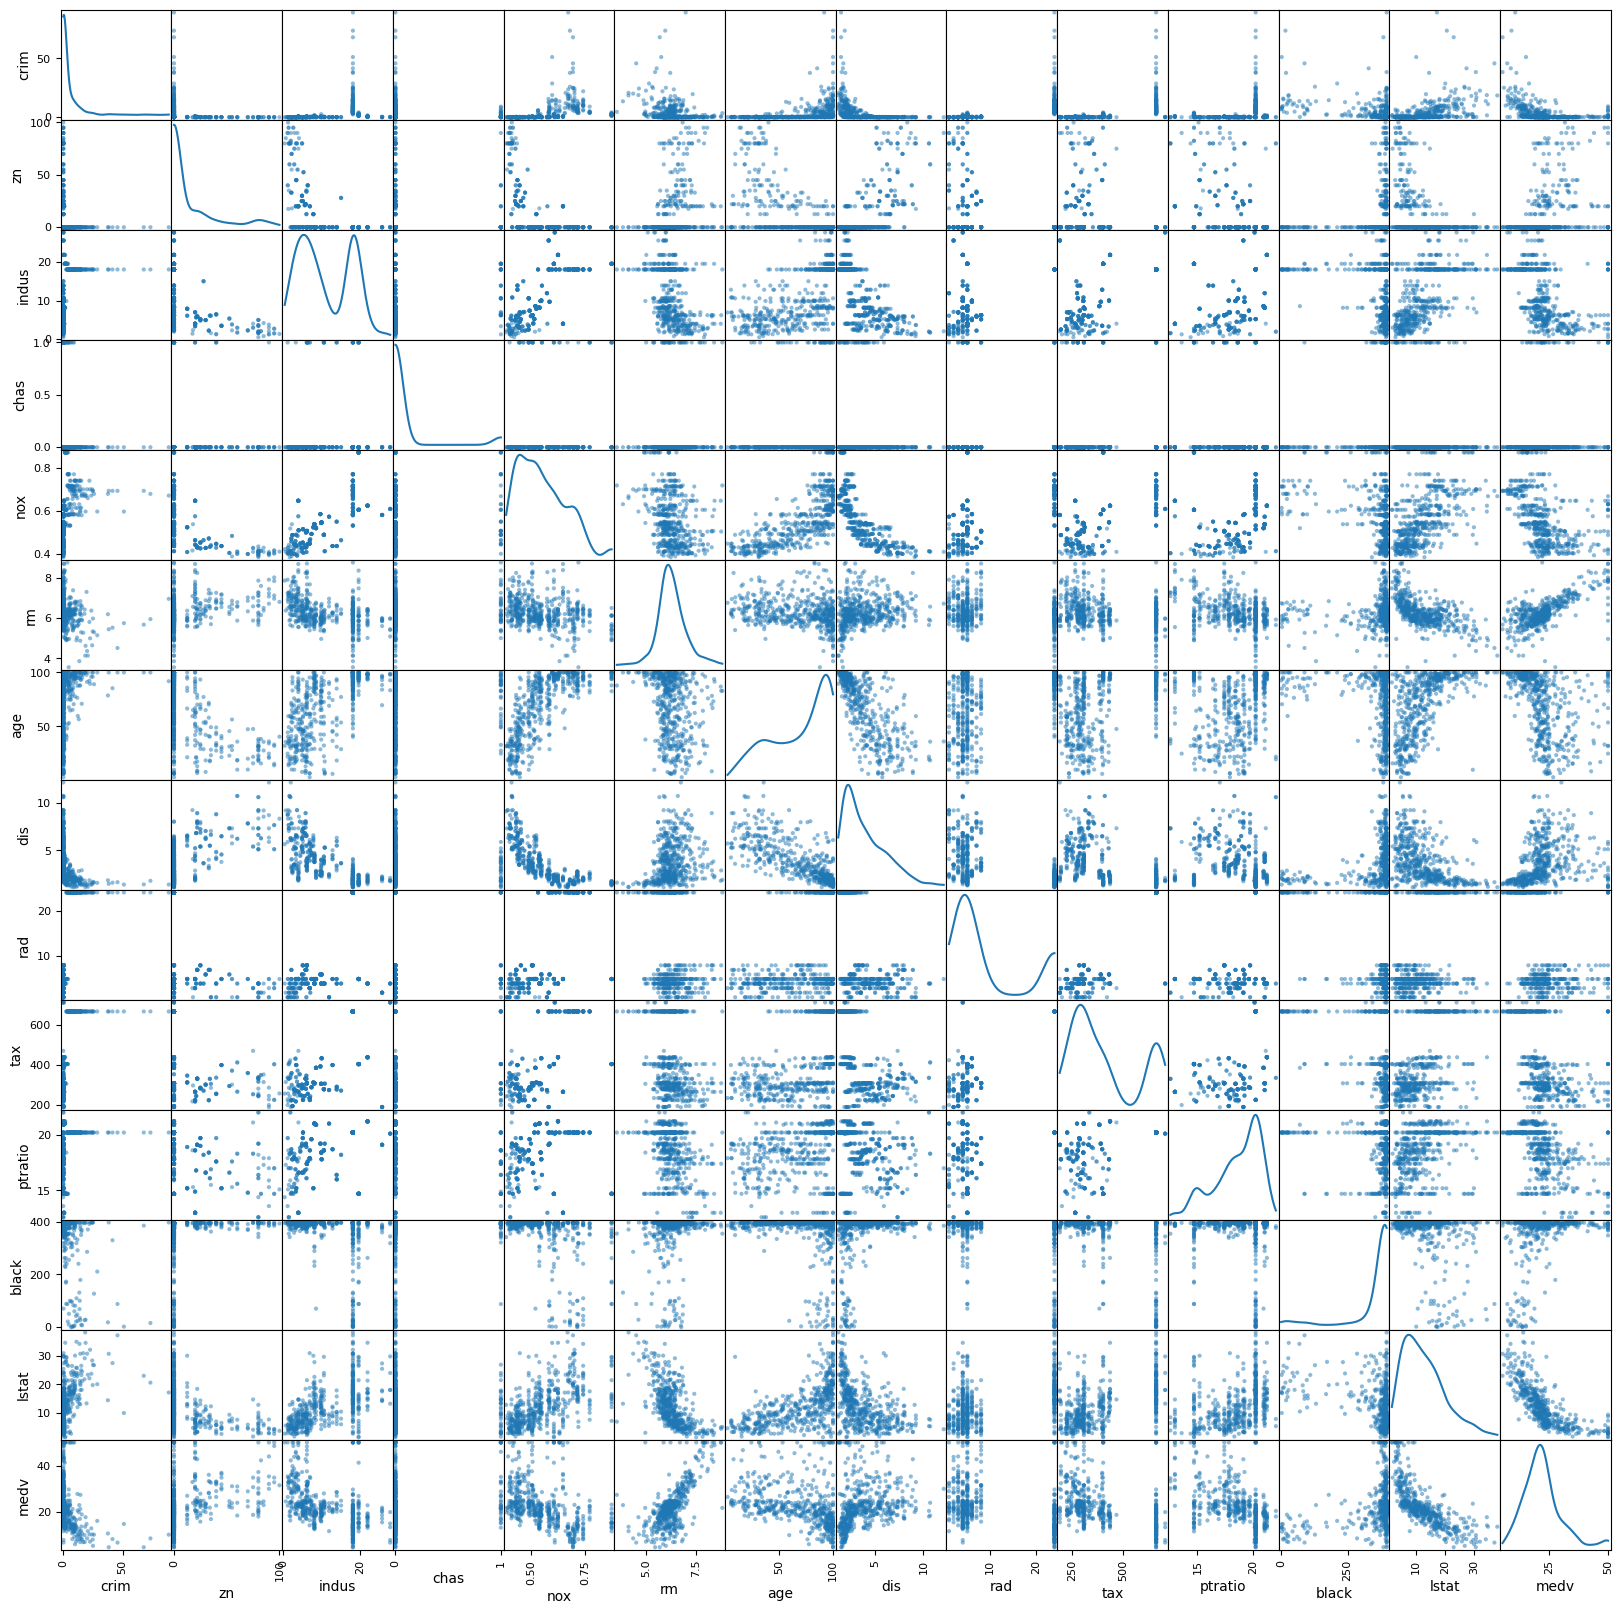

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Boston.csv")

pd.plotting.scatter_matrix(df, diagonal ="kde", figsize = (20,20))

Q: Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

A: Since there are so many data, and it would be too great an effort to try to draw conclusions data by data, first the most important variables will be shown, and then draw conclusions.

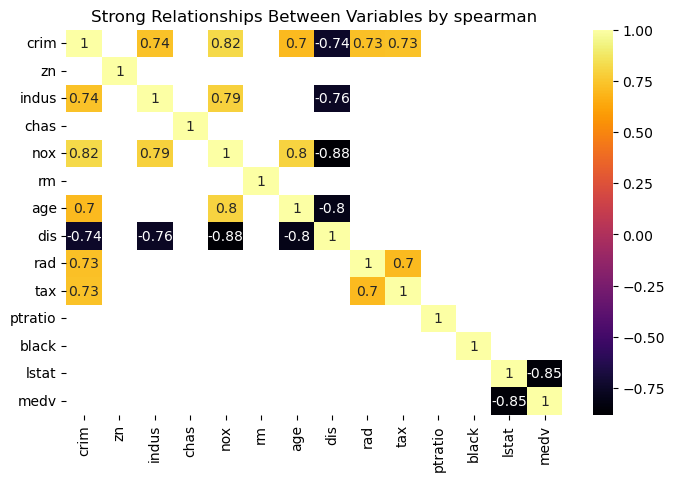

[('nox', 'dis', -0.8800148627197036),
 ('lstat', 'medv', -0.8529141394922163),
 ('crim', 'nox', 0.821464656776125),
 ('age', 'dis', -0.8016097949244995),
 ('nox', 'age', 0.7951529068588947),
 ('indus', 'nox', 0.7911891327243891),
 ('indus', 'dis', -0.7570796991701856),
 ('crim', 'dis', -0.7449861410662117),
 ('crim', 'indus', 0.7355237433006272),
 ('crim', 'tax', 0.7290448989667166),
 ('crim', 'rad', 0.727806967939369),
 ('rad', 'tax', 0.7048757244922312),
 ('crim', 'age', 0.7041399841460586)]

In [144]:
def sr(index ="",mi=0.6):
    strong_relationships = []
    for i in range(len(df.corr(index).columns)):
        for j in range(i + 1, len(df.corr(index).columns)):
            if abs(df.corr(index).iloc[i, j]) >= mi:
                strong_relationships.append((df.corr(index).columns[i], df.corr(index).columns[j], df.corr(index).iloc[i, j]))

    
    strong_relationships.sort(key=lambda x: abs(x[2]), reverse=True)
    
    plt.figure(figsize=(8, 5))
    sns.heatmap(df.corr(index), annot=True, cmap="inferno",mask=df.corr(index).abs() < mi)
    plt.title("Strong Relationships Between Variables by "+index)
    plt.show()
    
    return(strong_relationships)



sr("spearman",0.7)

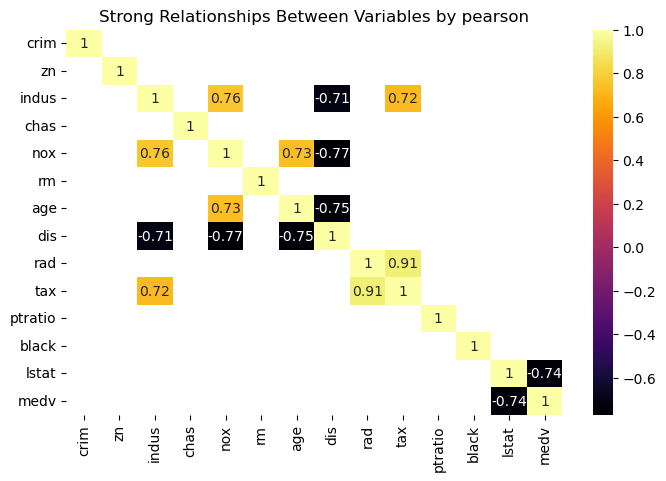

[('rad', 'tax', 0.9102281885331865),
 ('nox', 'dis', -0.7692301132258282),
 ('indus', 'nox', 0.7636514469209139),
 ('age', 'dis', -0.747880540868632),
 ('lstat', 'medv', -0.7376627261740145),
 ('nox', 'age', 0.7314701037859592),
 ('indus', 'tax', 0.7207601799515422),
 ('indus', 'dis', -0.7080269887427675)]

In [145]:
sr("pearson",0.7)

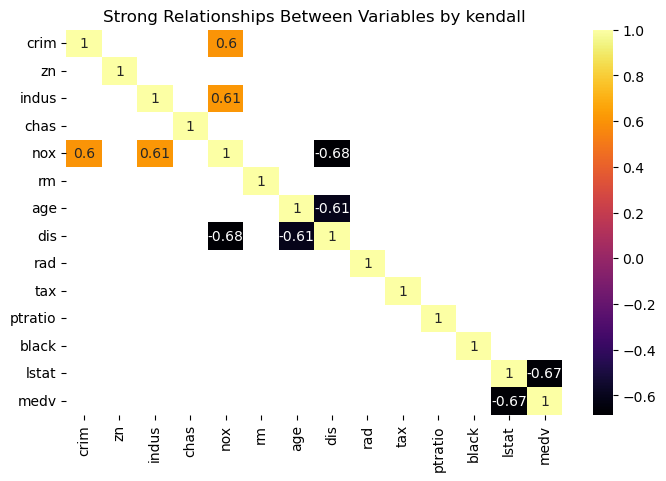

[('nox', 'dis', -0.6839303015058917),
 ('lstat', 'medv', -0.6686564797085403),
 ('indus', 'nox', 0.6120298042051938),
 ('age', 'dis', -0.6098356115540903),
 ('crim', 'nox', 0.6033611880757813)]

In [146]:
sr("kendall",0.6)

<Axes: xlabel='rad', ylabel='tax'>

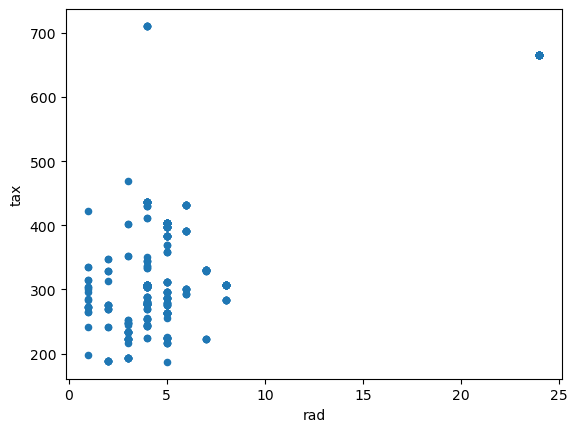

In [143]:
df.plot.scatter(x ="rad", y = "tax")

It can be seen how in the case of the relationship between rad and tax, there is no real relationship, in some cases the relationship will be false (in fact this happens with all the relationships that include: rad, tax, ptratio, chas and indus)

Q: Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

In [187]:
cm = df.corr("kendall")

vc = cm["crim"].drop("crim")
vc = vc.reset_index()
vc = list(vc.itertuples(index=False))
vc.sort(key=lambda x: abs(x[1]), reverse=True)

vc

[Pandas(index='nox', crim=0.6033611880757813),
 Pandas(index='rad', crim=0.5639687214923208),
 Pandas(index='tax', crim=0.5449562242582898),
 Pandas(index='dis', crim=-0.539878373118398),
 Pandas(index='indus', crim=0.5210138396858948),
 Pandas(index='age', crim=0.4972967345696106),
 Pandas(index='zn', crim=-0.4620565782486835),
 Pandas(index='lstat', crim=0.4548365480200966),
 Pandas(index='medv', crim=-0.4039635563809384),
 Pandas(index='ptratio', crim=0.312767680108097),
 Pandas(index='black', crim=-0.26437758321675064),
 Pandas(index='rm', crim=-0.21171838354555317),
 Pandas(index='chas', crim=0.033948487275502225)]

<Axes: xlabel='crim', ylabel='rm'>

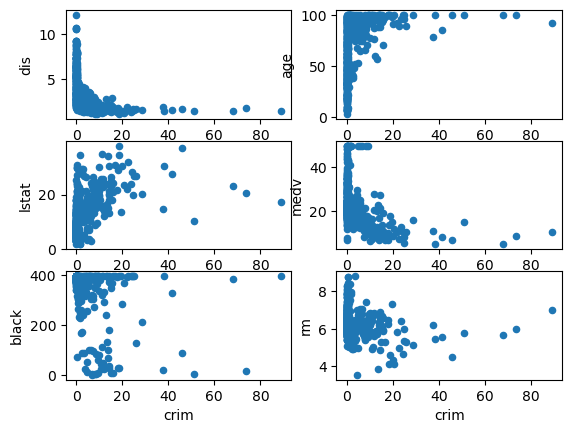

In [236]:
fig, axes = plt.subplots(nrows=3, ncols=2)

df.plot.scatter(x ="crim", y = "dis", ax =axes[0,0])
df.plot.scatter(x ="crim", y = "age", ax =axes[0,1])
df.plot.scatter(x ="crim", y = "lstat", ax =axes[1,0])
df.plot.scatter(x ="crim", y = "medv", ax =axes[1,1])
df.plot.scatter(x ="crim", y = "black", ax =axes[2,0])
df.plot.scatter(x ="crim", y = "rm", ax =axes[2,1])

A:In three of the relationships a perceptible relationship can be observed, both with dis, and in medv there is a negative relationship. While in the case of age it is a positive relationship.

Q: How many of the suburbs in this data set bound the Charles river?

In [220]:
#A:

pd.value_counts(df["chas"])

0    471
1     35
Name: chas, dtype: int64

Q: What is the median pupil-teacher ratio among the towns in this data set?

In [222]:
#A:

df["ptratio"].median()

19.05

Q: Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [226]:
#A:

mm = df["medv"].min()

filt = df[df["medv"] == mm]

filt["medv"]

398    5.0
405    5.0
Name: medv, dtype: float64

Q: In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?

In [232]:
#A more than seven rooms per dwelling: 

(df["rm"]>7).sum()

64

In [234]:
#A more than eight rooms per dwelling:

(df["rm"]>8).sum()

13